In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('../Data/housing-data.txt')
data.tail()

,size,price
195,225.0,274.688859
196,226.0,264.306241
197,227.0,280.971109
198,228.0,255.968253
199,229.0,273.728558


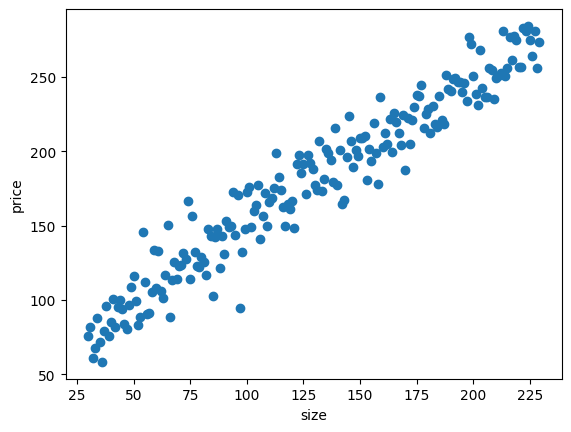

In [4]:
plot = plt.scatter(data['size'], data['price'])
plt.xlabel('size')
plt.ylabel('price')
plot

In [5]:
def compute_cost(theta, X, y):
    m = len(y)  # Number of training examples
    h = X @ theta  # Hypothesis function: hθ(x) = X * θ
    squared_errors = np.square(h - y)
    J = np.sum(squared_errors) / (2 * m)  # Cost function: J(θ) = (1/2m) * sum((hθ(x) - y)^2)
    return J
    

In [6]:
## defining variables
# Number of observations
n= len(data['size'])
# defining vactor X
X_vector = np.array(data['size']).reshape(n, -1)
#creating one vector
x_ones = np.ones(n)
#converting the array to vertical
ones_vector  =x_ones.reshape(n,1)
# creat a matrix of x_ones and X
X = np.concatenate((X_vector, ones_vector), axis=1)


In [7]:
# defining y vector(price)
y = np.array(data['price']).reshape(n, 1)


In [8]:
# defining theta
theta = np.array([[0],[0]])

In [9]:
# call ths function
J = compute_cost(theta, X, y)
print('cost = {:.2f}'.format(J))

cost = 17840.78


In [18]:
def gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y)  # Number of training examples
    cost_history = []  # List to store the cost history

    for _ in range(num_iters):
        h = X @ theta  # Hypothesis function: hθ(x) = X * θ
        errors = h - y
        delta = (X.T @ errors) / m  # Gradient descent update
        theta = theta - alpha * delta  # Updating theta
        cost = compute_cost(theta, X, y)  # Computing cost
        cost_history.append(cost)  # Appending cost to history

    return theta, cost_history

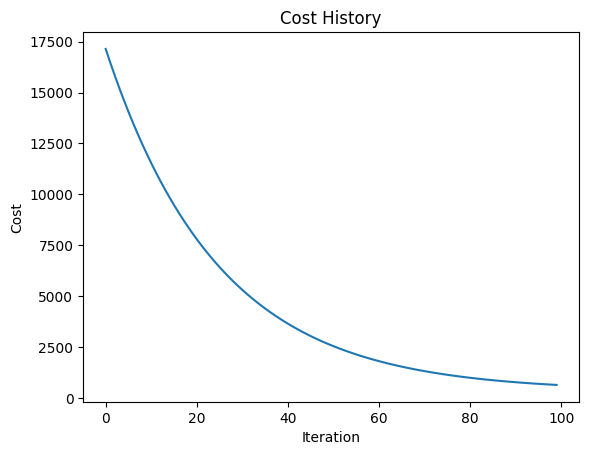

In [19]:
# Define initial values
theta = np.array([0, 0])
theta = theta.reshape(-1, 1)
alpha = 1e-6
num_iters = 100

# Call gradient_descent function
optimized_theta, cost_history = gradient_descent(X, y, theta, alpha, num_iters)

# Plotting cost history
plt.plot(range(num_iters), cost_history)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost History")
plt.show()